In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import  accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')

In [1]:
!ls ./output/

best_model_fcn.hdf5  df_metrics.csv   history.csv
df_best_model.csv    epochs_loss.png  model_init_fcn.hdf5


In [3]:
import keras
from keras.models import load_model
model = load_model('./output/best_model_fcn.hdf5')

In [9]:
x_train,y_train,x_test,y_test = np.load('./data.npy')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_pred = model.predict(x_test)


In [11]:
p1 = np.argmax(y_pred,axis=1)
p2 = np.argmax(y_test,axis=1)


In [16]:
confusion_matrix(p2,p1)

array([[ 20,  38, 173],
       [  0, 351,   0],
       [  0,   0, 351]])

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt


In [2]:
from sklearn.manifold import TSNE


In [6]:
x_train,y_train,x_test,y_test = np.load('./data.npy')
print("Training on {} samples".format(len(x_train)))
print("Validation on {} samples".format(len(x_test)))
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train[:,:,1]

Training on 2573 samples
Validation on 933 samples


In [7]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x_train)
standardized_data.shape


(2573, 100)

In [5]:
x_train.shape

(2573, 100, 3)

In [12]:
label = np.argmax(y_train,axis=1)

In [14]:
model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
reduced_data = model.fit_transform(standardized_data)
reduced_df = np.vstack((reduced_data.T, label)).T
reduced_df = pd.DataFrame(data=reduced_df, columns=["X", "Y", "label"])
reduced_df.label = reduced_df.label.astype(np.int)
reduced_df.head()


,X,Y,label
0,-22.054514,-34.130207,2
1,-29.674656,0.548220,1
2,63.104073,-4.009051,1
3,-20.722736,-19.510817,0
4,-25.357872,-26.188787,1


In [15]:
import seaborn as sns
reduced_df.dtypes
g = sns.FacetGrid(reduced_df, hue='label', size=6).map(plt.scatter, 'X', 'Y').add_legend()


/home/sid/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


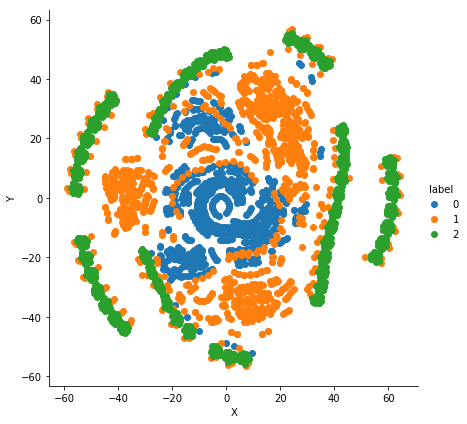

In [16]:
plt.show()